In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 100
x = np.random.uniform(-3,3,size=m)
y = x * 0.5 + 4. + np.random.normal(0.,1.,size=m)
X = x.reshape(-1,1)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [14]:
def poly_regression(degree):
    return Pipeline(
    [
        ('pl',PolynomialFeatures(degree=degree)),
        ('ss',StandardScaler()),
        ('lr',LinearRegression())
    ])

In [15]:
def model_plot(alg,X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    
    alg.fit(X_train,y_train)
    y_p = alg.predict(X_test)
    mse = mean_squared_error(y_p,y_test)
    
    X_plot = np.linspace(-3,3,m).reshape(-1,1)
    y_plot = alg.predict(X_plot)
    
    plt.scatter(x,y)
    plt.plot(X_plot[:,0],y_plot,color='r')
    plt.axis([-3,3,0,10])
    plt.show()
    print('mse',mse)

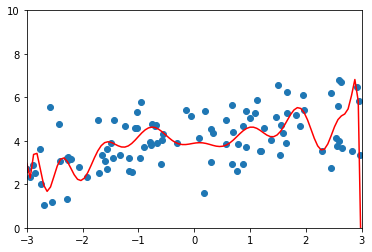

mse 1.8145467716236552


In [16]:
model_plot(poly_regression(20),X,y)

In [17]:
from sklearn.linear_model import Lasso

In [18]:
def lasso_reg(degree,alpha):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('ss',StandardScaler()),
        ('lass',Lasso(alpha = alpha))
    ])

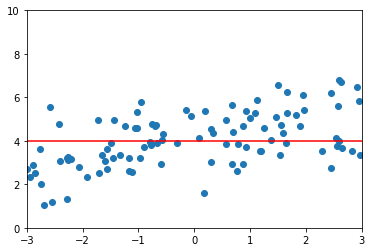

mse 1.7075567350862269


In [23]:
model_plot(lasso_reg(20,1),X,y)

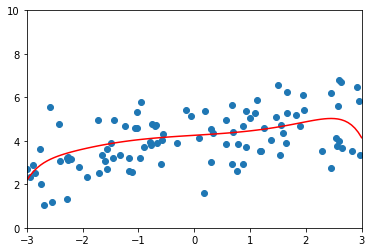

mse 1.3373296956652347


In [25]:
model_plot(lasso_reg(20,0.01),X,y)

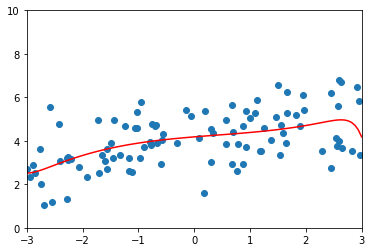

mse 1.178238079472778


In [27]:
model_plot(lasso_reg(20,0.01),X,y)